## Group 1: Week 12

# 'Game of Thrones' Story Through a Data Science Narrative

****

In [1]:
# import required libraries
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Load Data

In [2]:
# set the path to the data files directory
home = os.getcwd()
the_path = home + '/Data/'

# read the csv files into dataframes
data_list = ['battles', 'deaths', 'predictions']

for data in data_list:
    file_path = the_path + str(data) + '.csv'
    the_code = str(data) + ' = pd.read_csv(file_path)'
    exec(the_code)

deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


### Review the Battles

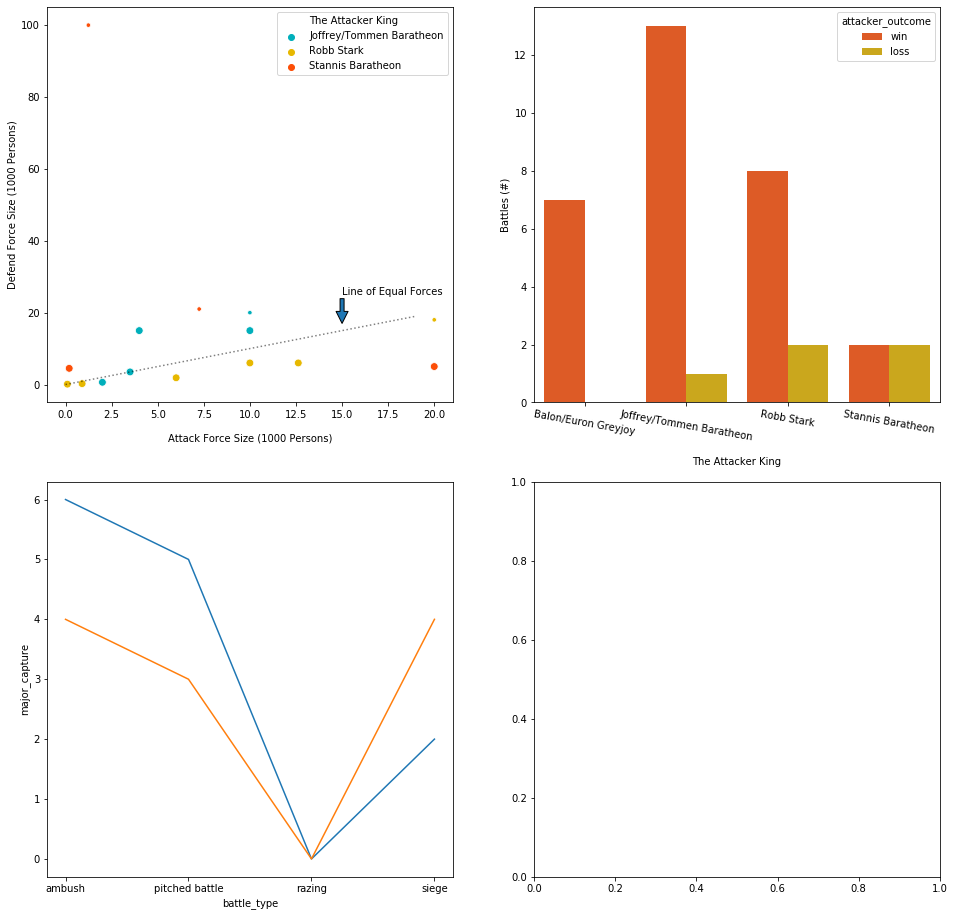

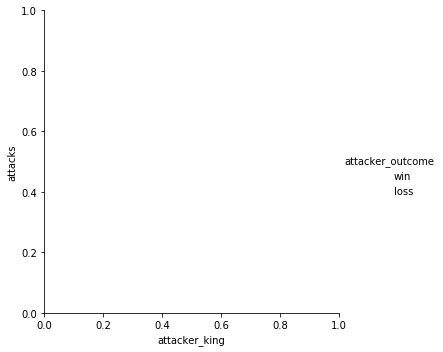

In [54]:
# set the space for 4 plots
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

# ----------------------------------------------------------------------
# Upper Left Plot
# compare the ratio of attack to defend force sizes
# ----------------------------------------------------------------------
# clean and preprocess battles data regarding the attacker/defender force sizes
# and also the outcome for the attacker
battles_pre = battles.copy()
battles_pre = battles_pre.dropna(subset=['attacker_size', 'defender_size'])
battles_pre.attacker_outcome.replace(['win', 'loss'], [3, 1], inplace=True)

# normalize the force sizes
battles_pre['attacker_size'] = battles_pre['attacker_size'].div(1000)
battles_pre['defender_size'] = battles_pre['defender_size'].div(1000)

# draw the plot
sns.scatterplot(data=battles_pre, x='defender_size', y='attacker_size', hue='attacker_king',
                s=20*battles_pre['attacker_outcome'], ax=axes[0,0],
                palette = ('#00AFBB', '#E7B800', '#FC4E07'))

# draw the equality line
x = np.arange(min(battles_pre.attacker_size.max(), battles_pre.defender_size.max()))
axes[0,0].plot(x, x, ':', color='black', alpha=.5)
axes[0,0].annotate('Line of Equal Forces', xy=(15, 17), xytext=(15, 25), arrowprops=dict())

# set the labels and the legend
lgnd1 = axes[0,0].legend()
lgnd1.texts[0].set_text('The Attacker King')
axes[0,0].set_xlabel('Attack Force Size (1000 Persons)', labelpad=14)
axes[0,0].set_ylabel('Defend Force Size (1000 Persons)')


# ----------------------------------------------------------------------
# Upper Right Plot
# compare the ratio of win to attack for the kings
# ----------------------------------------------------------------------
# preprocess the battles data regarding the number of attacks per kings
# and the attacks' outcomes
battles_pre = battles.copy()
battles_pre = battles_pre.groupby(['attacker_king', 'attacker_outcome']) \
                                  ['attacker_king'].count().reset_index(name='attacks')

# draw the plot    
sns.catplot(x='attacker_king', y='attacks', hue='attacker_outcome', ax=axes[0,1],
            kind='bar', data=battles_pre, palette = ('#FC4E07', '#E7B800'), ci=None);

# set the labels and the legend
#axes[0,1].legend('The Attacker Outcome')
#legend2.get_texts()[0].title('The Attacker Outcome')
axes[0,1].set_xlabel('The Attacker King', labelpad=14)
axes[0,1].set_ylabel('Battles (#)')
axes[0,1].tick_params(axis='x', labelrotation=-10);



# ----------------------------------------------------------------------
# Lower Left Plot
# compare the number of major casualties among different types of battle
# ----------------------------------------------------------------------
battles_pre = battles.copy()
battles_pre = battles_pre.groupby(['battle_type'])['major_death','major_capture'].sum().reset_index()

sns.lineplot(x='battle_type', y='major_death', ax=axes[1,0], markers=True, dashes=False, data=battles_pre)
sns.lineplot(x='battle_type', y='major_capture', ax=axes[1,0], markers=True, dashes=False, data=battles_pre)
#hue='major_capture', style="event",
plt.show()

### Upper Left Plot
Robb Stark used to attack with a smaller-size army, comparing with the enemy.



# deaths

death rate ragarding gender
death rate regarding nobility
death rate regarding book
death rate regarding Allegiances

#### Predictions

checking the rate successful predictions.
check the death rate title.
check meaningful correlations between dead and alive characters. 